# Лабораторная по pandas, numpy, scipy.stats, matplotlib, seaborn


### Дедлайн: 26 декабря 23:59

Работа принимается один раз, как только вы отправили ее своему семинаристу по любому канаду связи.

Плагиат будет караться полной отменой баллов за лабораторную. 


 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)
 - [Официальная документация scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)

# Часть 1 `Numpy`, `Matplotlib`, `scipy.stats`

In [1]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

import typing

%matplotlib inline

## 1. Данные

<font color="red">В этой части другие библиотеки использовать запрещено. Шаблоны кода ниже менять нельзя. </font>

### Задача 1 (3 балла)
Имеется симметричная монета. Напишите функцию генерации независимых случайных величин из нормального и экспоненциального распределений с заданными параметрами.

In [2]:
# Эта ячейка -- единственная в задаче 1, в которой нужно использовать
# библиотечную функция для генерации случайных чисел.
# В других ячейках данной задачи используйте функцию coin.

# симметричная монета
coin = lambda size: np.random.choice([0, 1], size=size, p=[0.5, 0.5])

Проверьте работоспособность функции, сгенерировав 10 бросков симметричной монеты.

In [3]:
coin(size=10)

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1])

**Часть 1.** Напишите сначала функцию генерации случайных величин из равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Нужно реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` как число, так и объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы. Аргумент `precision` отвечает за число $n$.

**Решение**

In [4]:
def uniform(size=1, precision=30):
    bins = coin(size * precision)
    bin_matrix = bins.reshape(size, precision)
    nums = []
    for row in bin_matrix:
        num = 0
        for i, bit in enumerate(row):
            num += bit * (2 ** -(i + 1))
        nums.append(num)
    return np.array(nums)

Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам.

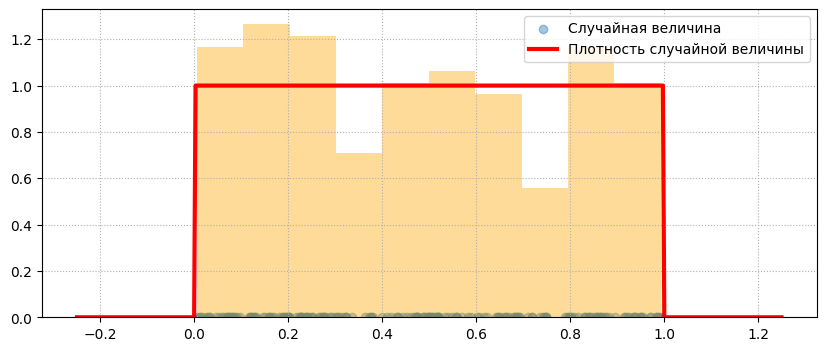

In [5]:
size = 200
grid = np.linspace(-0.25, 1.25, 500)
sample = uniform(size, precision = 50)

# Отрисовка графика
plt.figure(figsize = (10, 4))

# отображаем значения случайных величин полупрозрачными точками
plt.scatter(
    sample,
    np.zeros(size),
    alpha = 0.4,
    label = "Случайная величина"
)

# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(
    sample,
    bins = 10,
    density = True,
    alpha = 0.4,
    color = "orange"
)

# рисуем график плотности
plt.plot(
    grid,
    sps.uniform.pdf(grid),
    color = 'red',
    linewidth = 3,
    label = "Плотность случайной величины"
)

plt.legend()
plt.grid(ls=':')
plt.show()

Исследуйте, как меняются значения случайных величин в зависимости от `precision`.

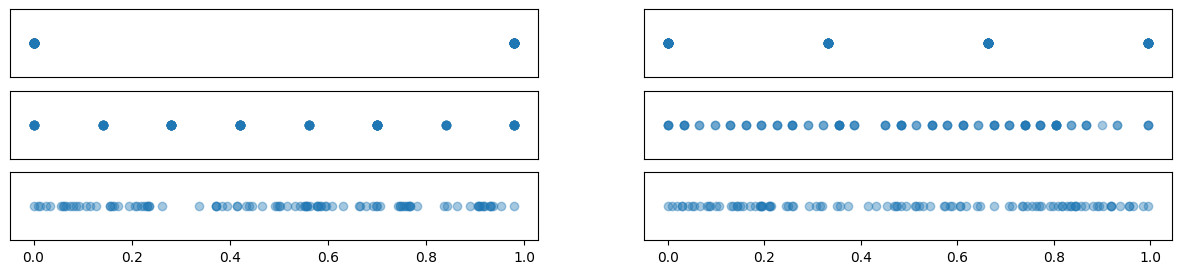

In [6]:
size = 100

plt.figure(figsize = (15, 3))

for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(
        uniform(size, precision),
        np.zeros(size),
        alpha = 0.4
    )
    plt.yticks([])
    if i < 4: plt.xticks([])

plt.show()

**Вывод:**

In [7]:
"""
При увеличении значения precision увеличивается число бит, отведённых для описания случайной величины, что расширяет диапазон возможных значений. В итоге плотность распределения становится более однородной и постепенно приближается к равномерному распределению [0,1].
""".strip()

'При увеличении значения precision увеличивается число бит, отведённых для описания случайной величины, что расширяет диапазон возможных значений. В итоге плотность распределения становится более однородной и постепенно приближается к равномерному распределению [0,1].'

**Часть 2.** Напишите функцию генерации случайных величин в количестве `size` штук из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера, которое заключается в следующем. Пусть $\xi$ и $\eta$ — независимые случайные величины, равномерно распределенные на $(0, 1]$. Тогда случайные величины $X = cos(2\pi\xi)\sqrt{-2\ln\eta}, Y = sin(2\pi\xi)\sqrt{-2\ln\eta}$ являются независимыми нормальными $\mathcal{N}(0, 1)$.

Реализация должна быть без циклов. В качестве параметра `size` может быть как число, так и объект `tuple` любой размерности. Желательно использовать как можно меньше бросков монеты. Можно использовать реализованную ранее функцию `uniform`.

In [8]:
def normal(size=1, loc=0, scale=1, precision=30):
    u1 = uniform(size, precision)
    u2 = uniform(size, precision)
    radius = np.sqrt(-2 * np.log(u1))
    angle = 2 * np.pi * u2
    gaussian = radius * np.cos(angle)
    return loc + scale * gaussian

normal(size=20)

array([ 0.07777969, -0.30405733,  1.29601683,  2.07728662,  0.8471285 ,
        0.3609824 ,  0.21573388, -1.38607894,  0.06850859,  1.64278468,
        0.7774383 ,  0.98018639,  0.93104048,  1.50537785, -1.42420817,
       -0.51734441,  0.86718429,  0.55547842,  0.75486128, -0.1752641 ])

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

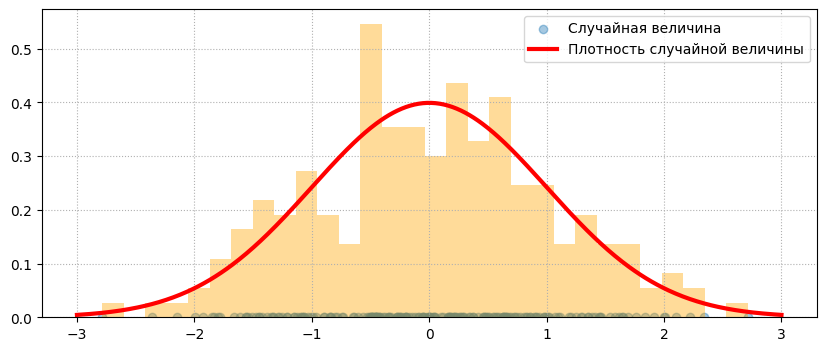

In [9]:
size = 200
grid = np.linspace(-3, 3, 500)
sample = normal(size, 0, 1, 50)

# Отрисовка графика
plt.figure(figsize = (10, 4))

# Значения случайных величин
plt.scatter(
    sample,
    np.zeros(size),
    alpha = 0.4,
    label = "Случайная величина"
)

# Нормированная гистограмма
plt.hist(
    sample,
    bins = 30,
    density = True,
    alpha = 0.4,
    color = "orange"
)

# Плотность
plt.plot(
    grid,
    sps.norm.pdf(grid),
    color = 'red',
    linewidth = 3,
    label = "Плотность случайной величины"
)

plt.legend()
plt.grid(ls=':')
plt.show()

Решение основывается на **методе обратного преобразования**

Поскольку ф-ия экспоненциального распределения $F(x) = (1 - e^{-\lambda x}) \cdot I(x > 0)$ является строго монотонной и непрерывной на $R$, то у неё есть обратная ф-ия $F^{-1}: [0, 1] \rightarrow R$. 
Таким образом, если $U_1, \ldots, U_n$ - выборка из равномерного распределения, то $X_1, \ldots, X_n,$ где $X_i = F^{-1}(U_i),$ - выборка из экспоненциального распределения

$F^{-1}(x) = -\dfrac{1}{\lambda}{ }\ln(1 - x)$

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [10]:
def expon(size=1, lambd=1, precision=30):
    u = uniform(size=size, precision=precision)
    return - (1 / lambd) * np.log(1 - u)

expon(10)

array([1.86698657, 1.10947371, 0.13184593, 0.62378372, 1.13739004,
       1.24972048, 0.59728626, 2.97535931, 2.43033637, 0.08364002])

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

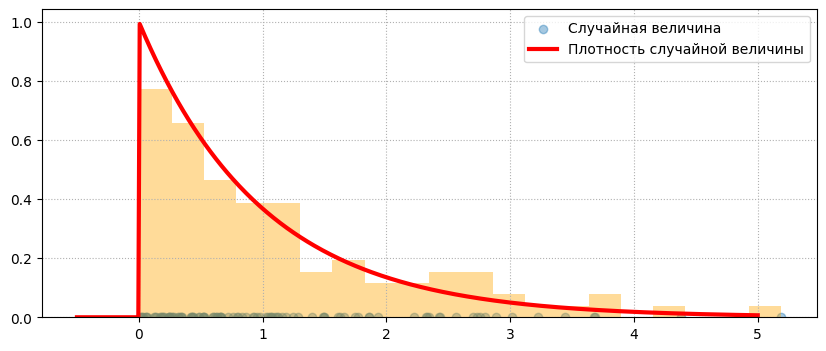

In [11]:
size = 100
grid = np.linspace(-0.5, 5, 500)
sample = expon(size, 1, 50)

# Отрисовка графика
plt.figure(figsize = (10, 4))

# Случайные величины
plt.scatter(
    sample,
    np.zeros(size),
    alpha = 0.4,
    label = "Случайная величина"
)

# Нормированная гистограмма
plt.hist(
    sample,
    bins = 20,
    density = True,
    alpha = 0.4,
    color = "orange"
)

# Плотность
plt.plot(
    grid,
    sps.expon.pdf(grid),
    color = 'red',
    linewidth = 3,
    label = "Плотность случайной величины"
)

plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод по задаче:**

In [12]:
"""
Из представленных графиков видно, что гистограммы сгенерированных выборок нормального и экспоненциального распределений хорошо соответствуют их теоретическим плотностям вероятности. Это подтверждает корректность использованных методов генерации: метода Бокса-Мюллера для нормального распределения и метода обратного преобразования для экспоненциального распределения.
""".strip()

'Из представленных графиков видно, что гистограммы сгенерированных выборок нормального и экспоненциального распределений хорошо соответствуют их теоретическим плотностям вероятности. Это подтверждает корректность использованных методов генерации: метода Бокса-Мюллера для нормального распределения и метода обратного преобразования для экспоненциального распределения.'

### Задача 2  (3 балла)
Напишите функцию, реализующую матричное умножение. При вычислении разрешается создавать объекты размерности три. Запрещается пользоваться функциями, реализующими матричное умножение, например, `numpy.dot`, операция `@`, операция умножения в классе `numpy.matrix`, суммы Эйнштейна и прочие. Разрешено пользоваться только простыми поэлементными векторно-арифметическими операциями над `numpy.array`, любыми операциями изменения формы массива. 

*Авторское решение занимает одну строчку.*

In [13]:
def matrix_multiplication(A, B):
    return np.array([np.dot(A[i,:], B[:,j]) for i in range(A.shape[0]) for j in range(B.shape[1])]).reshape(A.shape[0], B.shape[1])

Проверьте правильность реализации на случайных матрицах. Должен получится ноль, либо очень малое число в пределах машинной точности.

In [14]:
A = sps.uniform.rvs(size=(10, 20))
B = sps.uniform.rvs(size=(20, 30))
np.abs(matrix_multiplication(A, B) - A @ B).sum()

np.float64(1.8207657603852567e-13)

На основе опыта: вот в таком стиле многие из вас присылали бы нам свои работы, если не стали бы делать это задание :)

In [15]:
def stupid_matrix_multiplication(A, B):
    C = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

Проверьте, насколько быстрее работает ваш код по сравнению с неэффективной реализацией `stupid_matrix_multiplication`. Эффективный код на авторском ноутбуке работает почти в 200 раз быстрее. Для примера посмотрите также, насколько быстрее работают встроенные `numpy`-функции.

In [16]:
A = sps.uniform.rvs(size=(400, 200))
B = sps.uniform.rvs(size=(200, 300))

%time C1 = matrix_multiplication(A, B)
%time C2 = A @ B  # python 3.5
%time C3 = np.matrix(A) * np.matrix(B)
%time C4 = stupid_matrix_multiplication(A, B)
%time C5 = np.einsum('ij,jk->ik', A, B)

print(10)

CPU times: total: 109 ms
Wall time: 112 ms
CPU times: total: 0 ns
Wall time: 1 ms
CPU times: total: 0 ns
Wall time: 999 μs
CPU times: total: 6.89 s
Wall time: 7.97 s
CPU times: total: 0 ns
Wall time: 5.01 ms
10


Ниже для примера приведена полная реализация функции. Ваc мы, конечно, не будем требовать проверять входные данные на корректность, но документации к функциям нужно писать.

In [17]:
def matrix_multiplication(A, B):
    '''Возвращает матрицу, которая является результатом
    матричного умножения матриц A и B.

    '''

    # Если A или B имеют другой тип, нужно выполнить преобразование типов
    A = np.array(A)
    B = np.array(B)

    # Проверка данных входных данных на корректность
    assert A.ndim == 2 and B.ndim == 2, 'Размер матриц не равен 2'
    assert A.shape[1] == B.shape[0], \
        ('Матрицы размерностей {} и {} неперемножаемы'.format(A.shape, B.shape))

    n = A.shape[0]
    m = B.shape[1]

    C = np.zeros((n, m))

    for i in range(n):
        for j in range(m):
            C[i, j] = np.sum(A[i, :] * B[:, j])

    return C

### Задача 3  (4 балла)

<a target="_blank" href="https://ru.wikipedia.org/wiki/Броуновское_движение">Броуновское движение</a> — беспорядочное движение микроскопических видимых взвешенных частиц твёрдого вещества в жидкости или газе, вызываемое тепловым движением частиц жидкости или газа. 

Математически броуновское движение обычно моделируется как некоторая случайная функция $X_t$ аргумента $t$, который несет смысл времени. В каждый фиксированный момент времени $t$, значение $X_t$ является случайной величиной, характеризующей положение частицы в момент времени $t$. Считается, что для любого интервала времени $(s, t)$ перемещение (точнее, приращение) частицы за этот интервал времени имеет нормальное распределение: $X_t - X_s \sim \mathcal{N}(0, (t-s)\sigma^2)$. Причем величина $X_t - X_s$ не зависит от приращения частицы за другие интервалы времени, не пересекающиеся с интервалом $(s, t)$. Математическая корректность данного определения будет доказана в курсе случайных процессов.

Многомерное броуновское движение соответствует одномерным по каждой координате.

Сгенерировать траекторию частицы в интервале времени $(0, T)$ в предположении броуновского движения можно следующим образом:
1. Выбрать начальное положение, обычно это начало координат.
2. Разбить интервал $(0, T)$ равномерно на интервалы длины $\Delta t$. Величина $\Delta t$ должна быть достаточно мала, в частности, на графиках не должно быть видно дискретности компьютерной генерации. 
3. Сгенерировать приращение частицы на каждом интервале по каждой координате независимо из распределения $\mathcal{N}(0, \sigma^2 \Delta t)$.
4. Для получения значений $X_t$ просуммировать необходимые приращения.



**1.**
Реализуйте функцию семплирования траекторий броуновского движения. Функция должна принимать в качестве аргументов:
- Параметр $\sigma$;
- Время $T$;
- Количество интервалов длины $\Delta t$;
- Размерность пространства, в котором реализуется траектория;
- Количество различных частиц, для которых нужно сгенерировать траектории.

Функция должна вернуть трехмерный массив `result`, где `result[i, j, k]` &mdash; значение $j$-й координаты $i$-й частицы на $k$-м шаге.

При реализации считайте, что все частицы в начальный момент времени находятся в начале координат.
Функцию нужно реализовать для произвольной размерности, не используя циклы. Можно использовать функции из `scipy`.

In [18]:
def brownian_motion(sigma: float, T: float, num_intervals: int, dimension: int, num_particles: int) -> np.ndarray:
    dt = T / num_intervals
    deltas = sps.norm.rvs(scale=np.sqrt(sigma**2 * dt), size=(num_particles, num_intervals, dimension))
    path = np.cumsum(deltas, axis=1)
    return path

**2.**
Визуализируйте траектории для двумерного броуновского движения для трех разных значений $\sigma$. Число интервалов не менее 10000. Для каждого значения $\sigma$ постройте 6 разных частиц в виде сетки графиков $2 \times 3$. Координатные оси должны иметь одинаковый масштаб.

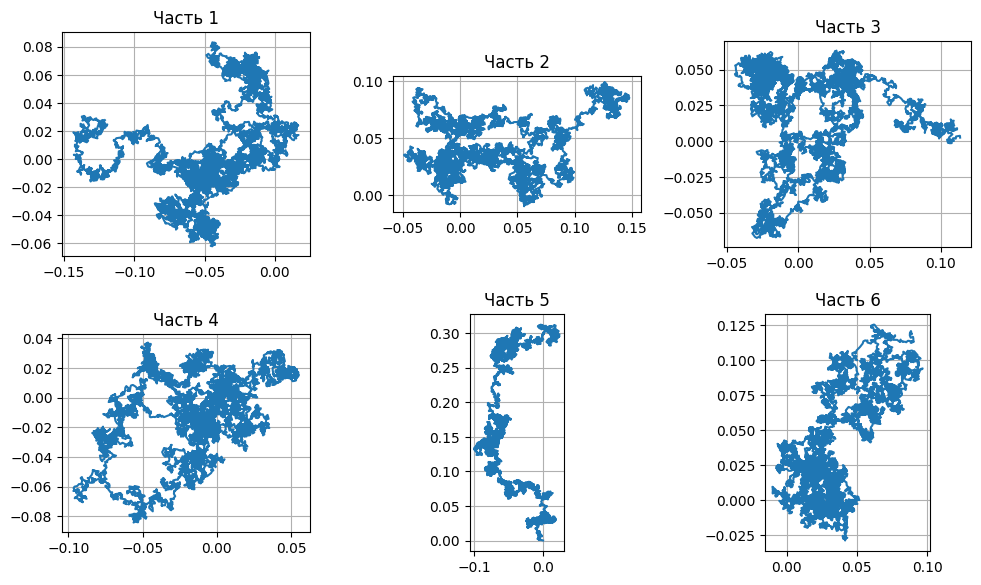

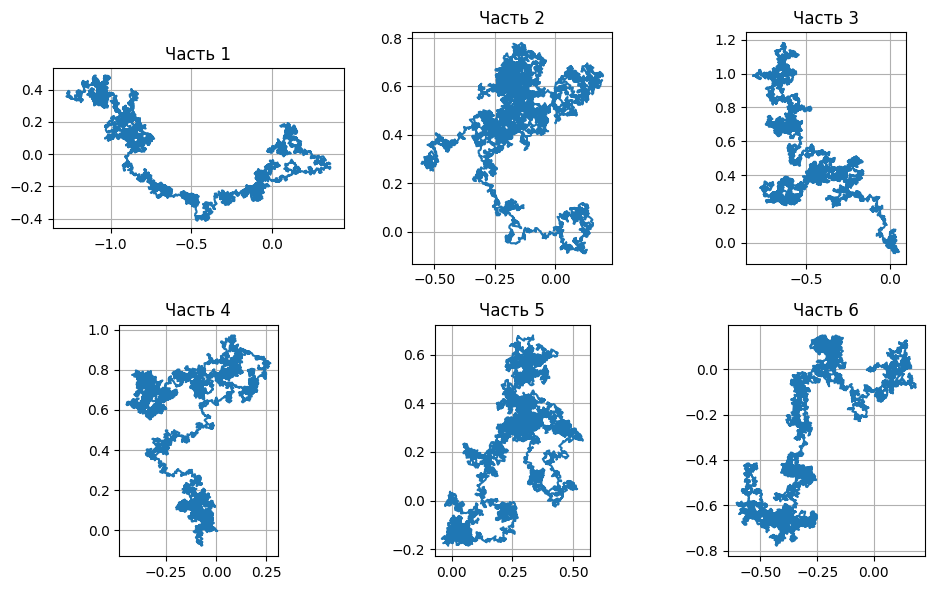

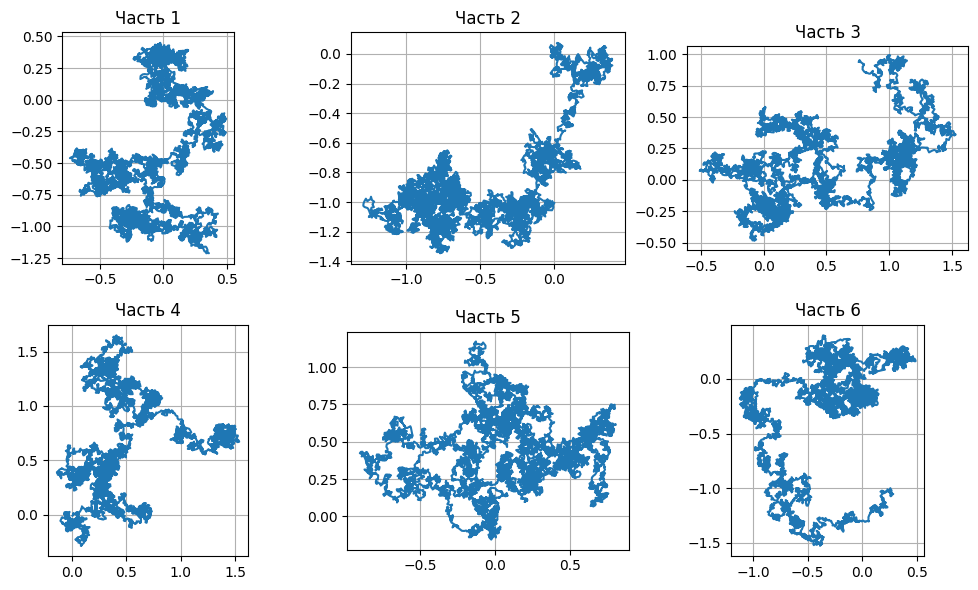

In [19]:
def plot_2d_brownian_motion(sigma: float):
    path = brownian_motion(sigma, 1, 10000, 2, 6)

    fig, axes = plt.subplots(2, 3, figsize=(10, 6))
    for i, ax in enumerate(axes.flatten()):
        ax.plot(path[i, :, 0], path[i, :, 1])
        ax.set_title(f'Часть {i+1}')
        ax.set_aspect('equal')
        ax.grid(True)
    plt.tight_layout()
    plt.show()

sigmas = [0.1, 0.5, 1.0]

for sigma in sigmas:
    plot_2d_brownian_motion(sigma)

Как вид траектории зависит от $\sigma$?

In [20]:
"""
Параметр σ в модели броуновского движения определяет амплитуду флуктуаций и степень хаотичности траектории частицы. Большое значение σ приводит к резким и хаотичным изменениям направления движения, делая траекторию более бурной и схожей с диффузией при большом количестве шагов. Напротив, малое значение σ обеспечивает более плавное и устойчивое движение, сужая разброс координат частицы, и при σ, стремящемся к нулю, траектория приближается к прямой линии.
""".strip()

'Параметр σ в модели броуновского движения определяет амплитуду флуктуаций и степень хаотичности траектории частицы. Большое значение σ приводит к резким и хаотичным изменениям направления движения, делая траекторию более бурной и схожей с диффузией при большом количестве шагов. Напротив, малое значение σ обеспечивает более плавное и устойчивое движение, сужая разброс координат частицы, и при σ, стремящемся к нулю, траектория приближается к прямой линии.'

Сгенерируйте траекторию в трехмерном пространстве и постройте для нее 3D-график.

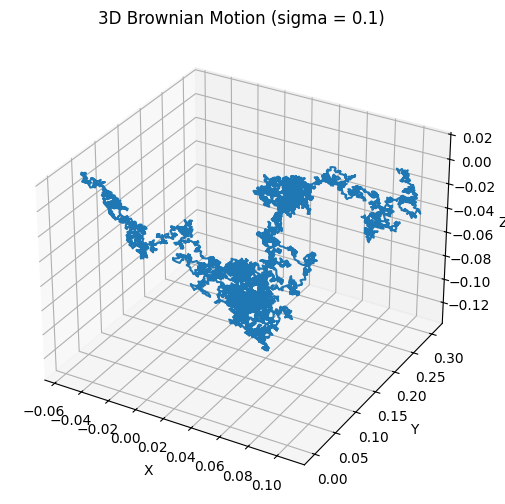

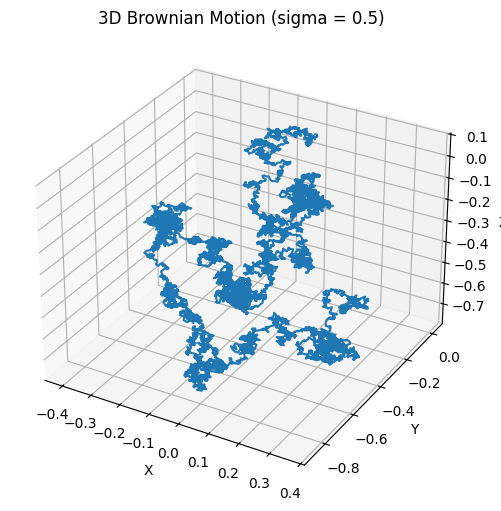

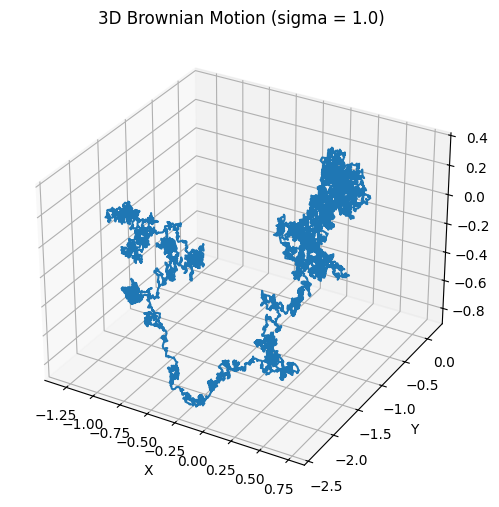

In [21]:
def plot_3d_brownian_motion(sigma: float):
    path = brownian_motion(sigma, 1, 10000, 3, 1)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(path[0, :, 0], path[0, :, 1], path[0, :, 2])
    ax.set_title(f'3D Brownian Motion (sigma = {sigma})')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

for sigma in sigmas:
    plot_3d_brownian_motion(sigma)

**3.** Исследуйте, как зависит среднее расстояние частицы до начала координат от времени и от параметра $\sigma$. Проведите исследование для разных размерностей пространства. Под средним в теории понимается математическое ожидание. На практике нужно исследовать его оценку посредством генерации множества траекторий.

В исследовании обязательно дожны присутствовать текстовые пояснения и графики. Сделайте выводы.

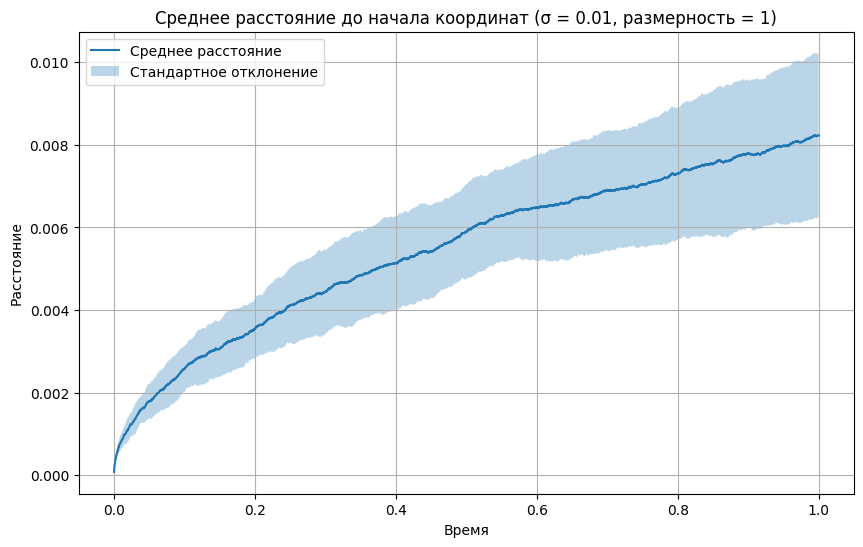

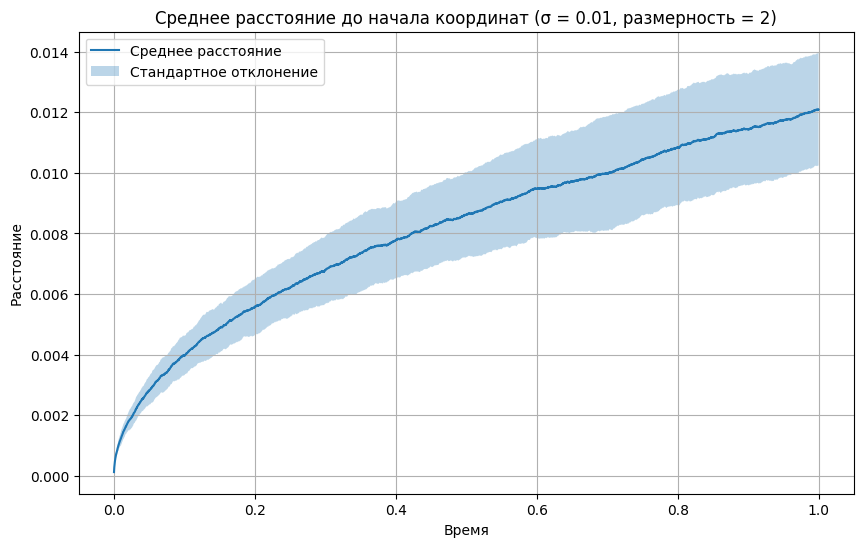

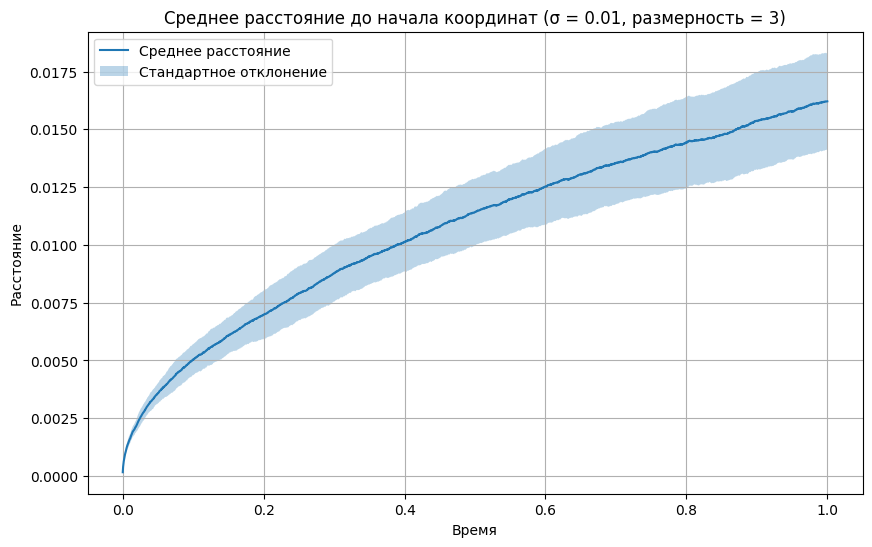

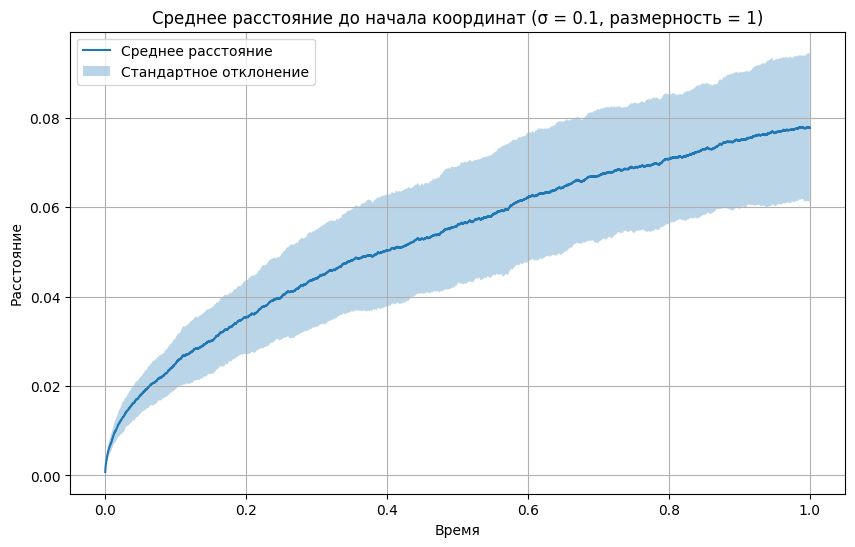

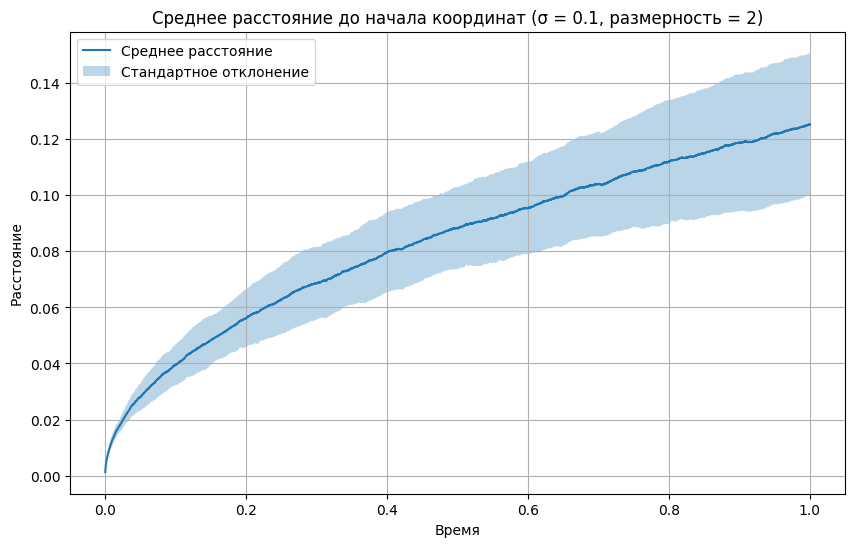

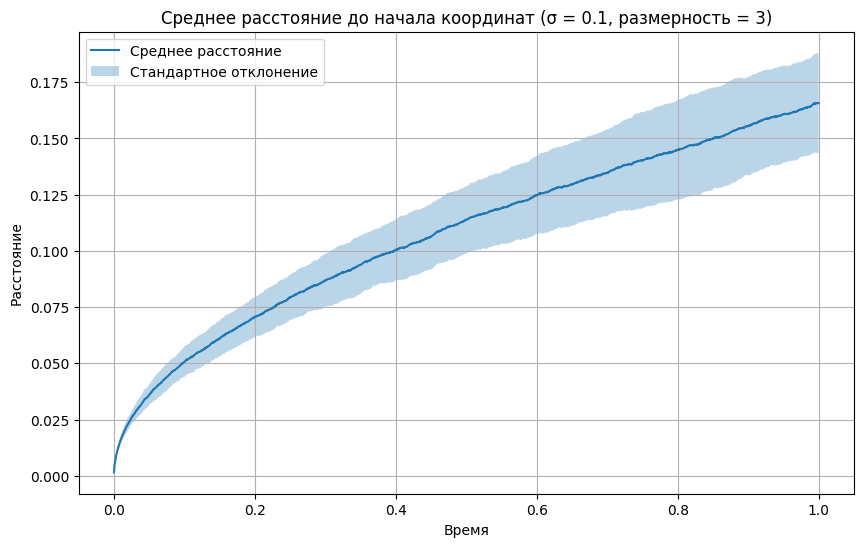

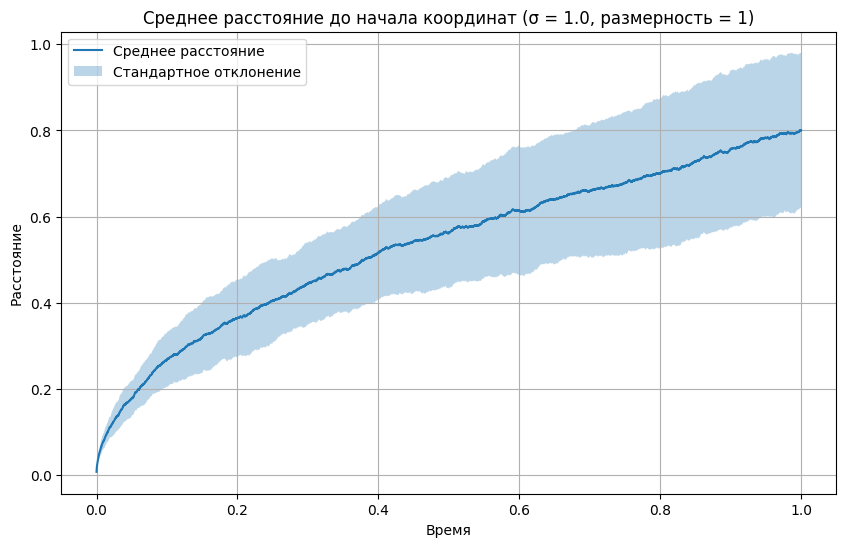

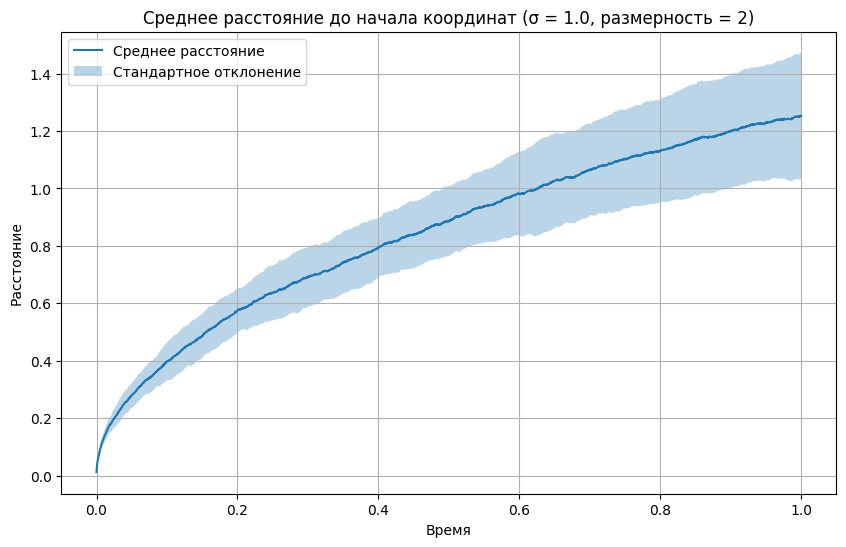

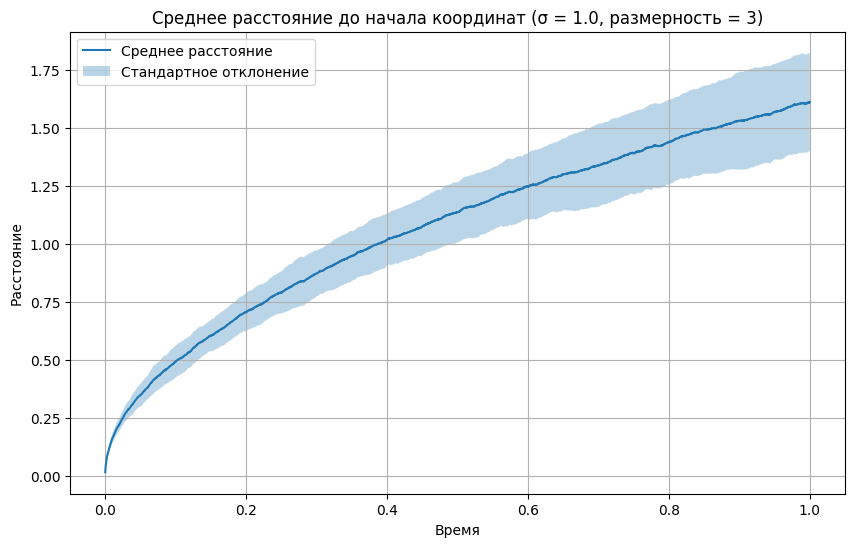

σ = 0.01  | Размерность = 1  | Среднее расстояние = 0.0082 | Стандартное отклонение = 0.0020
σ = 0.01  | Размерность = 2  | Среднее расстояние = 0.0121 | Стандартное отклонение = 0.0019
σ = 0.01  | Размерность = 3  | Среднее расстояние = 0.0162 | Стандартное отклонение = 0.0021
σ = 0.1   | Размерность = 1  | Среднее расстояние = 0.0777 | Стандартное отклонение = 0.0167
σ = 0.1   | Размерность = 2  | Среднее расстояние = 0.1253 | Стандартное отклонение = 0.0256
σ = 0.1   | Размерность = 3  | Среднее расстояние = 0.1657 | Стандартное отклонение = 0.0223
σ = 1.0   | Размерность = 1  | Среднее расстояние = 0.8000 | Стандартное отклонение = 0.1794
σ = 1.0   | Размерность = 2  | Среднее расстояние = 1.2524 | Стандартное отклонение = 0.2193
σ = 1.0   | Размерность = 3  | Среднее расстояние = 1.6105 | Стандартное отклонение = 0.2130


In [22]:
def average_distance_to_origin(sigma: float, T: float, num_intervals: int, dimension: int, num_particles: int, num_trajectories: int) -> np.ndarray:
    distances = np.zeros((num_trajectories, num_intervals))

    for i in range(num_trajectories):
        path = brownian_motion(sigma, T, num_intervals, dimension, num_particles)
        traj_distances = np.sqrt(np.sum(np.square(path), axis=2))
        distances[i] = np.mean(traj_distances, axis=0)

    return distances

def plot_average_distance(distances: np.ndarray, sigma: float, T: float, num_intervals: int, dimension: int):
    plt.figure(figsize=(10, 6))
    time = np.linspace(0, T, num=int(num_intervals))
    mean_distance = np.mean(distances, axis=0)
    std_distance = np.std(distances, axis=0)
    plt.plot(time, mean_distance, label="Среднее расстояние")
    plt.fill_between(time, mean_distance - std_distance, mean_distance + std_distance, alpha=0.3, label="Стандартное отклонение")
    plt.title(f'Среднее расстояние до начала координат (σ = {sigma}, размерность = {dimension})')
    plt.xlabel('Время')
    plt.ylabel('Расстояние')
    plt.legend()
    plt.grid(True)
    plt.show()

sigmas = [0.01, 0.1, 1.0]
T = 1
num_intervals = 10000
dimensions = [1, 2, 3]
num_particles = 10
num_trajectories = 100

res = []
for sigma in sigmas:
    for dimension in dimensions:
        distances = average_distance_to_origin(sigma, T, num_intervals, dimension, num_particles, num_trajectories)
        plot_average_distance(distances, sigma, T, num_intervals, dimension)
        res.append((sigma, dimension, distances))

for sigma, dimension, distances in res:
    print(f"σ = {sigma:<5} | Размерность = {dimension:<2} | Среднее расстояние = {np.mean(distances[:, -1]):.4f} | Стандартное отклонение = {np.std(distances[:, -1]):.4f}")

# Часть 2 `Pandas`, `Matplotlib`, `Seaborn`

## Задача 1  (2 балла)

Начнем с необходимых приготовлений.

In [23]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла "coins.csv". Создайте объект типа pandas.DataFrame с именем coins и в качестве индекса выберите колонку с датой.

In [24]:
coins = pd.read_csv('coins.csv')

Посмотрим что получилось

In [25]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
3,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

#### Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):
#### 1. Сколько всего различных монет представлено в датасете?

In [26]:
coins["symbol"].nunique()

66

#### 2. За какой период данные мы имеем? 

In [27]:
coins["date"].min(), coins["date"].max()

('2013-04-28', '2018-06-06')

#### 3. Есть ли пропуски в данных? Какой природы эти пропуски? 

In [28]:
coins.isnull().sum()

date                  0
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

#### 4. У какой монеты и когда была самая высокая цена?

In [29]:
coins.loc[coins.high.idxmax()]['name'], coins.loc[coins.high.idxmax()]['date'], coins.loc[coins.high.idxmax()]['high']

('Bitcoin', '2017-12-17', np.float64(20089.0))

#### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. 

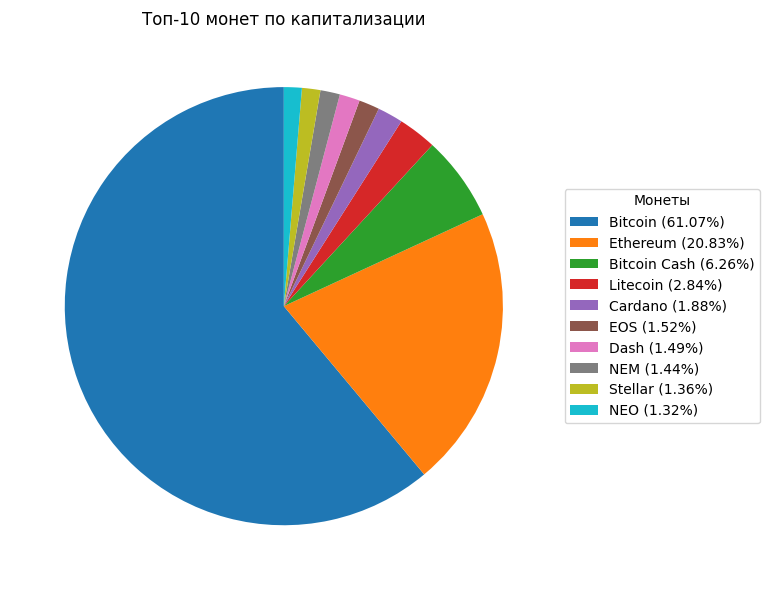

Монета с наибольшей капитализацией: Bitcoin (56.16%)
Монета с наименьшей капитализацией: KingN Coin (0.00001%)


In [30]:
# Группировка данных по названию монеты и суммирование капитализации
total_market_cap = coins.groupby('name')['market'].sum()

# Вычисление общей капитализации всех монет
total_market_cap_sum = total_market_cap.sum()

# Нахождение монеты с наибольшей капитализацией
max_cap_coin = total_market_cap.idxmax()
max_cap = total_market_cap.max()
max_cap_percent = max_cap / total_market_cap_sum

# Нахождение монеты с наименьшей капитализацией
min_cap_coin = total_market_cap.idxmin()
min_cap = total_market_cap.min()
min_cap_percent = min_cap / total_market_cap_sum

# Выбор топ-10 монет по капитализации
top_10_coins = total_market_cap.sort_values(ascending=False).head(10)

# Построение круговой диаграммы для топ-10 монет
plt.figure(figsize=(10, 6))
wedges, _ = plt.pie(top_10_coins, startangle=90)

# Создание подписей для легенды с процентными долями
legend_labels = [f"{label} ({percent:.2%})" for label, percent in zip(top_10_coins.index, top_10_coins / top_10_coins.sum())]
plt.legend(wedges, legend_labels, title="Монеты", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Топ-10 монет по капитализации")
plt.tight_layout()
plt.show()

# Вывод информации о монетах с наибольшей и наименьшей капитализацией
print(f"Монета с наибольшей капитализацией: {max_cap_coin} ({max_cap_percent:.2%})")
print(f"Монета с наименьшей капитализацией: {min_cap_coin} ({min_cap_percent:.5%})")

## 2. Визуализация (2 балла)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

#### Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.
На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать matplotlib.finance.candlestick_ohlc (mpl_finance.candlestick_ohlc), но можно и без него.

In [31]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    # Фильтрация данных по символу и диапазону дат
    filtered_data = coins[
        (coins['symbol'] == symbol) &
        (coins['date'] >= start_date) &
        (coins['date'] <= end_date)
    ].copy()

    # Проверка наличия данных после фильтрации
    if filtered_data.empty:
        print("Нет данных для указанных параметров.")
        return

    # Преобразование столбца 'date' в datetime формат
    filtered_data['date'] = pd.to_datetime(filtered_data['date'])

    # Убедимся, что данные отсортированы по дате
    filtered_data.sort_values('date', inplace=True)

    # Создание фигуры и осей с увеличенным размером изображения
    plt.figure(figsize=(16, 10))
    ax = plt.gca()

    # Построение линий цен открытия и закрытия
    ax.plot(filtered_data['date'], filtered_data['open'], label='Цена открытия', linestyle='-', marker='o', color='green')
    ax.plot(filtered_data['date'], filtered_data['close'], label='Цена закрытия', linestyle='-', marker='o', color='blue')

    # Построение линий минимальной и максимальной цены
    ax.plot(filtered_data['date'], filtered_data['low'], label='Минимальная цена', linestyle='--', marker='v', color='red')
    ax.plot(filtered_data['date'], filtered_data['high'], label='Максимальная цена', linestyle='--', marker='^', color='orange')

    # Подписи осей и заголовок графика
    ax.set_title(f'Динамика цен для {symbol} ({start_date} - {end_date})', fontsize=16)
    ax.set_xlabel('Дата', fontsize=14)
    ax.set_ylabel('Цена (USD)', fontsize=14)

    # Форматирование дат на оси X для удобства чтения
    ax.xaxis.set_major_locator(mpl.dates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    # Добавление сетки
    ax.grid(True, linestyle='--', alpha=0.7)

    # Создание второго графика для отображения объемов торгов
    ax2 = ax.twinx()
    ax2.set_ylabel('Объем торгов', fontsize=14)
    ax2.bar(filtered_data['date'], filtered_data['volume'], color='grey', alpha=0.3, label='Объем торгов')
    ax2.tick_params(axis='y', labelsize=12)

    # Объединение легенд обоих графиков
    lines_1, labels_1 = ax.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax.legend(lines_1 + lines_2, labels_1 + labels_2, fontsize=12, loc='upper left')

    # Применение плотности данных для улучшения отображения
    plt.tight_layout()

    # Отображение графика
    plt.show()


Посмотрим, что получилось:

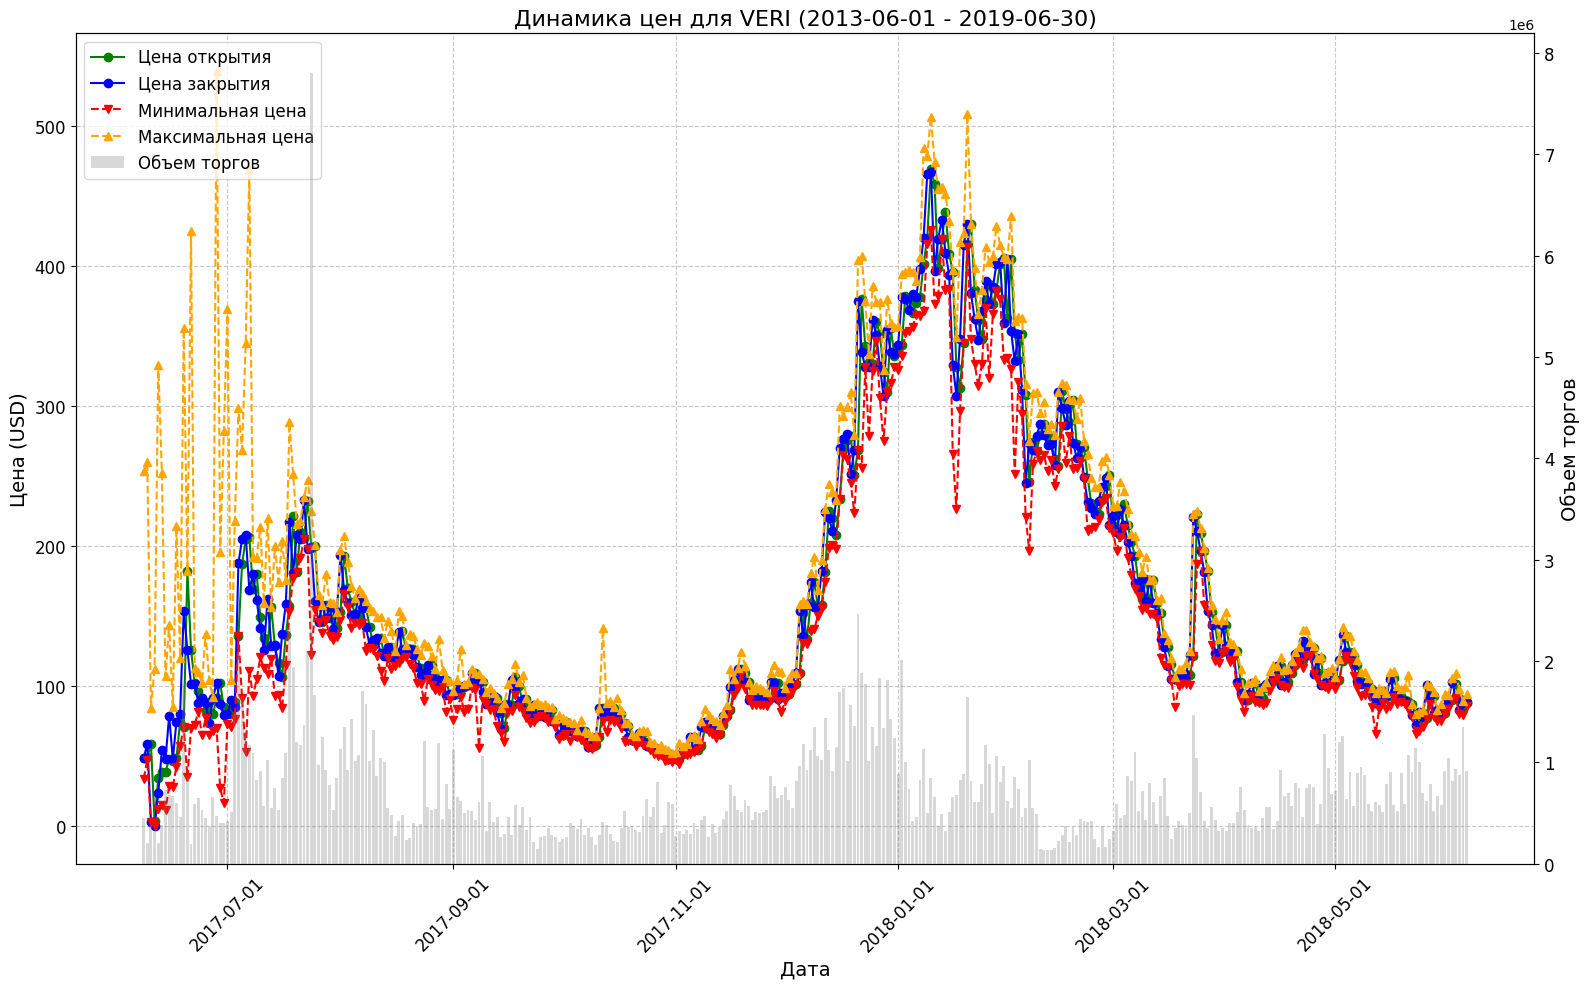

In [32]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (2 балла)
Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - pump'n'dump (накачка и сброс). Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются
вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде
успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

#### Ваша задача найти самый сильный pump'n'dump монеты на заданном промежутке времени. Для этого для каждого дня определим число pnd равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день когда pnd был максимален и величину pnd.

In [33]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    # Фильтрация данных по символу и диапазону дат
    filtered_data = coins[
        (coins['symbol'] == symbol) &
        (coins['date'] >= start_date) &
        (coins['date'] <= end_date)
    ].copy()

    # Проверка наличия данных после фильтрации
    if filtered_data.empty:
        raise ValueError(f"Нет данных для монеты {symbol} в период с {start_date} по {end_date}.")

    # Вычисление показателя PND для каждого дня
    # PND = максимальная цена дня / максимум из цены открытия и закрытия
    filtered_data['pnd'] = filtered_data['high'] / filtered_data[['open', 'close']].max(axis=1)

    # Поиск строки с максимальным PND
    max_pnd_row = filtered_data.loc[filtered_data['pnd'].idxmax()]

    print(f"Самый сильный pump'n'dump для {filtered_data['name'].iloc[0]} ({symbol}) произошёл {max_pnd_row['date']} и составил {max_pnd_row['pnd']:.6f}")

In [34]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

Самый сильный pump'n'dump для Bitcoin (BTC) произошёл 2017-11-29 и составил 1.142894


#### Сравните эти значения для разных монет.

In [35]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')
find_most_severe_pump_and_dump(coins, symbol='ETH', start_date='2017-06-01', end_date='2018-06-01')
find_most_severe_pump_and_dump(coins, symbol='LTC', start_date='2017-06-01', end_date='2018-06-01')

Самый сильный pump'n'dump для Bitcoin (BTC) произошёл 2017-11-29 и составил 1.142894
Самый сильный pump'n'dump для Ethereum (ETH) произошёл 2017-07-18 и составил 1.143351
Самый сильный pump'n'dump для Litecoin (LTC) произошёл 2018-02-07 и составил 1.108226


## 4. Окупаемость инвестиций (2 балла)

#### Вам нужно посчитать окупаемость инвестиций в криптовалюты на заданном промежутке времени. Окупаемость определяется как отношение изменения цены портфеля к исходной цене портфеля. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.
investments - dict в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD)

In [36]:
def compute_roi(coins, investments, start_date, end_date):
    # Фильтруем данные по заданному промежутку времени
    data = coins[(coins['date'] >= start_date) & (coins['date'] <= end_date)]

    initial_portfolio = 0  # Исходная стоимость портфеля
    final_portfolio = 0    # Конечная стоимость портфеля
    roi_per_coin = {}      # Окупаемость по каждой монете

    for coin, investment in investments.items():
        # Получаем данные для конкретной монеты
        coin_data = data[data['symbol'] == coin]

        if not coin_data.empty:
            # Исходная цена на начальную дату
            initial_price = coin_data['open'].iloc[0]
            # Конечная цена на конечную дату
            final_price = coin_data['close'].iloc[-1]

            # Рассчитываем количество монет, купленных за инвестицию
            amount = investment / initial_price

            # Рассчитываем итоговую стоимость инвестиций
            final_value = amount * final_price
            # Рассчитываем окупаемость в долларах для каждой монеты
            roi_dollars = final_value - investment
            # Рассчитываем окупаемость в процентах для каждой монеты
            roi_percentage = (final_price - initial_price) / initial_price

            # Обновляем общую исходную и конечную стоимость портфеля
            initial_portfolio += investment
            final_portfolio += final_value
            # Записываем окупаемость по текущей монете в одном словаре
            roi_per_coin[coin] = {
                'dollars': roi_dollars,
                'percentage': roi_percentage
            }

    # Рассчитываем общую окупаемость портфеля в %
    roi_percentage_total = (final_portfolio - initial_portfolio) / initial_portfolio
    # Рассчитываем общую окупаемость портфеля в $
    roi_total_dollars = final_portfolio - initial_portfolio
    give_dollars = lambda dollars: f"{'-' if np.sign(dollars) == -1 else ''}${abs(dollars):.2f}"

    print(f"Исходная стоимость портфеля: {give_dollars(initial_portfolio)}")
    print(f"Конечная стоимость портфеля: {give_dollars(final_portfolio)}")
    print(f"Окупаемость портфеля: {roi_percentage_total:.2%} ({give_dollars(roi_total_dollars)})")
    print(f"Окупаемость по каждой монете:")
    for coin, roi in roi_per_coin.items():
        dollars = roi['dollars']
        percentage = roi['percentage']
        print(f"- {coin}: {give_dollars(dollars)} ({percentage:.2%})")

In [37]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

Исходная стоимость портфеля: $1500.00
Конечная стоимость портфеля: $1459.17
Окупаемость портфеля: -2.72% (-$40.83)
Окупаемость по каждой монете:
- BTC: $11.40 (1.14%)
- LTC: -$52.24 (-10.45%)


In [38]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

Исходная стоимость портфеля: $1500.00
Конечная стоимость портфеля: $78526.28
Окупаемость портфеля: 5135.09% ($77026.28)
Окупаемость по каждой монете:
- BTC: $57981.12 (5798.11%)
- LTC: $19045.16 (3809.03%)
